# UCI Machine Learning Datasets: Mushrooms (Edible or Poisonous)

This notebook explores solutions to an elementary binary categorical classification problem: the UCI ML Mushroom dataset.

UC Irvine's Machine Learning department houses many datasets. These datasets are designed to be extremely reliable and allow algorithms to create excellent solutions. The UCI ML mushroom dataset provides over twenty datapoints to describe a mushroom as well as an attached label specifying if the mushroom is edible or poisonous. 

Because this classification problem has two categories, the problem becomes a **binary classification problem** as opposed to a **multi-class classification problem**. The primary difference between binary and multi-class classification problems lies in the solution. Binary classification problems typically employ regression algorithms, SVMs (Support Vector Machines), and gradient boosting algorithms to create high performance solutions.

An important note: for binary classification algorithms, accuracy and loss are not good metrics for determining the performance of a model. Instead, use an algorithm that is a function of the model's precision and recall, such as F1 score. This notebook uses F1 Score as a performance guaging metric.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import tensorflow as tf

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# A method that plots a confusion matrix nicely
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
  accuracy = np.trace(cm) / float(np.sum(cm))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(8, 6))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)

    if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      if normalize: plt.text(j, i, "{:0.4f}".format(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
      else: plt.text(j, i, "{:,}".format(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

### Data Preparation



In [ ]:
# Load the raw data
df = pd.read_csv('mushrooms.csv')

In [ ]:
print('Mushrooms DataFrame')
print(df.shape)
df.head()

Mushrooms DataFrame
(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
# Check for null values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
# Get unique class names
df['class'].unique()

array(['p', 'e'], dtype=object)

In [ ]:
# Check for dataset balance
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [ ]:
# Create the encoder
enc = OneHotEncoder()
enc

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [ ]:
# Encode the dataset
df_enc = enc.fit_transform(df).toarray()
df_enc

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Calculate feature names for presentation
enc_names = enc.get_feature_names(df.columns)
enc_names

array(['class_e', 'class_p', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f',
       'cap-surface_g', 'cap-surface_s', 'cap-surface_y', 'cap-color_b',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_f', 'bruises_t', 'odor_a', 'odor_c',
       'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s',
       'odor_y', 'gill-attachment_a', 'gill-attachment_f',
       'gill-spacing_c', 'gill-spacing_w', 'gill-size_b', 'gill-size_n',
       'gill-color_b', 'gill-color_e', 'gill-color_g', 'gill-color_h',
       'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p',
       'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y',
       'stalk-shape_e', 'stalk-shape_t', 'stalk-root_?', 'stalk-root_b',
       'stalk-root_c', 'stalk-root_e', 'stalk-root_r',
       'stalk-surface-above-ring_f', 'stal

In [ ]:
'Number of Encoded Features (Including Classification): {}'.format(len(enc_names))

'Number of Encoded Features (Including Classification): 119'

In [ ]:
'Number of Encoded Features (Excluding Classification): {}'.format(len(enc_names) - len(df['class'].unique()))

In [ ]:
# For the sake of it, proof we can invert the encoded dataset to obtain the original
df_enc_inv = enc.inverse_transform(df_enc)
df_enc_inv

array([['p', 'x', 's', ..., 'k', 's', 'u'],
       ['e', 'x', 's', ..., 'n', 'n', 'g'],
       ['e', 'b', 's', ..., 'n', 'n', 'm'],
       ...,
       ['e', 'f', 's', ..., 'b', 'c', 'l'],
       ['p', 'k', 'y', ..., 'w', 'v', 'l'],
       ['e', 'x', 's', ..., 'o', 'c', 'l']], dtype=object)

In [ ]:
# Split the encoded dataset into train and test groups
train, test = train_test_split(df_enc)

In [ ]:
# Get size of the datasets
print('Train Size: {}'.format(len(train)))
print('Test Size: {}'.format(len(test)))

Train Size: 6093
Test Size: 2031


In [ ]:
# Split the datasets into x and y
train_x = train[:,2:]
train_y = train[:,:1].ravel() # Because this is a binary classification problem, we only need one of the classification's encodings
test_x = test[:,2:]
test_y = test[:,:1].ravel()

In [ ]:
print(train_x[:10])
print(train_y[:10])
print(test_x[:10])
print(test_y[:10])

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 0. 0.]]
[0. 1. 1. 1. 0. 0. 1. 0. 1. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
[0. 1. 1. 0. 1. 0. 1. 1. 0. 1.]


### Model: Logistic Regression

Logistic Regression is an algorithm that uses a logistic function to model a binary classification problem. The two potential classifications are given the values of 0 and 1. The algorithm then finds a logistic function best fitting the dataset.

![](https://i.imgur.com/MEJ5PjO.png)

While simple to understand in two or three dimensions, logistic regression is difficult to visualize given hundreds or thousands of variables. This problem involves a simple dataset yet has 119 variables.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create the logistic regression model
lr = LogisticRegression().fit(train_x, train_y)

In [ ]:
# Calculate predictions using model
lr_threshold = 0.5 # Adjustable threshold
lr_prob = lr.predict_proba(test_x)[:,1]
lr_pred = np.where(lr_prob > threshold, 1, 0)
lr_score = lr.score(test_x, lr_pred)

In [ ]:
# Calculate the confusion matrix of real vs. logistic regression predictions
cm = tf.math.confusion_matrix(test_y, lr_pred, num_classes=2)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1001,    0],
       [   0, 1030]], dtype=int32)>

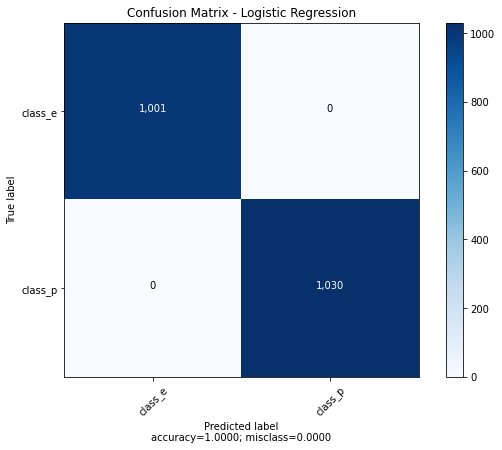

In [ ]:
plot_confusion_matrix(cm=cm.numpy(), target_names=enc_names[:2], normalize=False, cmap=plt.cm.Blues, title='Confusion Matrix - Logistic Regression')

### Model: Support Vector Machine (SVM)

A Support Vector Machine (SVM) is an algorithm that attempts to find a hyperplane that classifies the dataset. A more direct description is the equation for the barrier that distinguishes vectors as one of the two classifications.

![](https://i.imgur.com/VoXNkgX.png)![](https://i.imgur.com/FEg1wml.png)

Similar to logistic regression, SVMs are hard to visualize. In two dimensions, the SVM calculates the equation of a line as the hyperplane. In three dimensions, the line becomes a plane. As the dimensions increase into the hundreds, the result becomes harder to visualize.

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Create the SVM
svm = SVC().fit(train_x, train_y)

In [ ]:
# Calculate predictions using the model
svm_pred = svm.predict(test_x)

In [ ]:
# Calculate the confusion matrix of real vs. SVM predictions
cm = tf.math.confusion_matrix(test_y, svm_pred, num_classes=2)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1001,    0],
       [   0, 1030]], dtype=int32)>

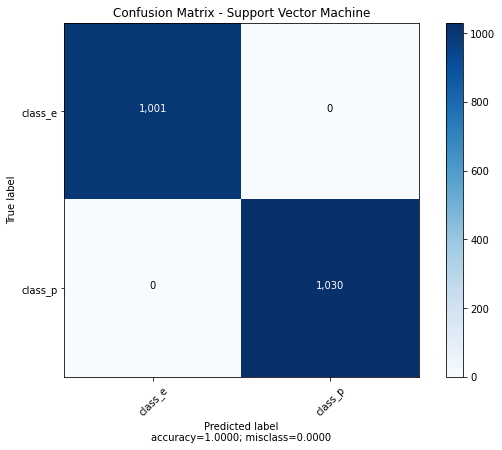

In [ ]:
plot_confusion_matrix(cm=cm.numpy(), target_names=enc_names[:2], normalize=False, cmap=plt.cm.Blues, title='Confusion Matrix - Support Vector Machine')

### Model: TensorFlow 3-Layer Sequential Neural Network

Neural networks are great solutions for classification problems where the input is consistent and quantifiable. This dataset provides consistent data points for each mushroom and we can utilize OneHotEncoding to quantify the categorical features.

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Activation, Dense

In [ ]:
# Create the neural network
nn = Sequential()

In [ ]:
# Add layers to the model
nn.add(Input(train_x.shape[1]))
nn.add(Dense(8))
nn.add(Activation('sigmoid'))
nn.add(Dense(1))
nn.add(Activation('sigmoid'))

In [ ]:
# Compile the neural network
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 944       
_________________________________________________________________
activation_4 (Activation)    (None, 8)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
_________________________________________________________________
activation_5 (Activation)    (None, 1)                 0         
Total params: 953
Trainable params: 953
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn_history = nn.fit(train_x, train_y, batch_size=128, epochs=100, verbose=2, validation_data=(test_x, test_y))

Epoch 1/100
48/48 - 1s - loss: 0.6271 - accuracy: 0.7768 - val_loss: 0.5592 - val_accuracy: 0.9143
Epoch 2/100
48/48 - 0s - loss: 0.5044 - accuracy: 0.9058 - val_loss: 0.4474 - val_accuracy: 0.9188
Epoch 3/100
48/48 - 0s - loss: 0.4088 - accuracy: 0.9109 - val_loss: 0.3642 - val_accuracy: 0.9188
Epoch 4/100
48/48 - 0s - loss: 0.3395 - accuracy: 0.9155 - val_loss: 0.3046 - val_accuracy: 0.9301
Epoch 5/100
48/48 - 0s - loss: 0.2882 - accuracy: 0.9263 - val_loss: 0.2591 - val_accuracy: 0.9444
Epoch 6/100
48/48 - 0s - loss: 0.2474 - accuracy: 0.9445 - val_loss: 0.2224 - val_accuracy: 0.9611
Epoch 7/100
48/48 - 0s - loss: 0.2138 - accuracy: 0.9585 - val_loss: 0.1921 - val_accuracy: 0.9734
Epoch 8/100
48/48 - 0s - loss: 0.1856 - accuracy: 0.9698 - val_loss: 0.1671 - val_accuracy: 0.9803
Epoch 9/100
48/48 - 0s - loss: 0.1620 - accuracy: 0.9778 - val_loss: 0.1465 - val_accuracy: 0.9818
Epoch 10/100
48/48 - 0s - loss: 0.1423 - accuracy: 0.9821 - val_loss: 0.1292 - val_accuracy: 0.9852
Epoch 11/

In [ ]:
# Create predictions using the neural network
nn_pred = nn.predict(test_x, batch_size=128)
nn_pred_round = np.round(nn_pred, decimals=0) # We round the predictions to create comparible classifications. This removes the ability to find the loss

In [ ]:
# Calculate the confusion matrix of real vs. NN predictions
cm = tf.math.confusion_matrix(test_y, nn_pred_round, num_classes=2)
cm.

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1001,    0],
       [   0, 1030]], dtype=int32)>

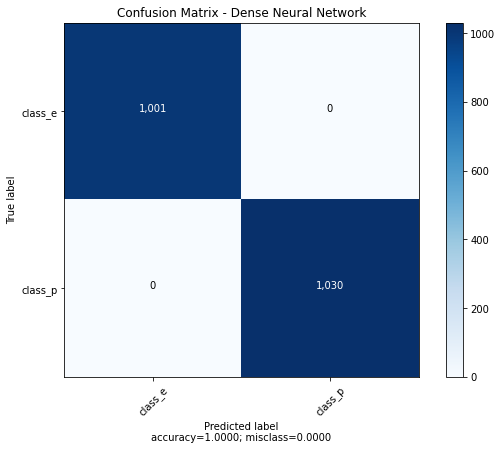

In [ ]:
plot_confusion_matrix(cm=cm.numpy(), target_names=enc_names[:2], normalize=False, cmap=plt.cm.Blues, title='Confusion Matrix - Dense Neural Network')

### Final Thoughts

Binary classification problems become more mathematical in nature and lack the fun more complex problems bring, such as image analysis or natural language processing (NLP). Nonetheless, this notebook is a good reference for common solutions to binary classification problems. The code blurbs will be great references for future projects, specifically the data preparation section.